In [2]:
import numpy as np 
import os 
import pandas as pd 
import sys
!{sys.executable} -m pip install gym

In [34]:
# Data loading and preprocessing
options_df = pd.read_csv('data/optionsTradeData.csv', delimiter=',')
options_df = options_df.replace({'ChainLocation': {'OTM':'0','ATM':'1','ITM':'1'}})

# Add a new column for the difference of the date to expiration date
options_df['Date'] = pd.to_datetime(options_df['Date'])
options_df['ExpirationDate'] = pd.to_datetime(options_df['ExpirationDate'])
options_df['DaysToExpiration'] = options_df['ExpirationDate'] - options_df['Date']
options_df['DaysToExpiration'] = options_df['DaysToExpiration'].dt.days

# We will select the data with the days to expiration within a range of 30 days
options_df = options_df.loc[options_df['DaysToExpiration'].between(1,30)]

print(options_df.head(10))

# Separate into dataframes for plotting
calls_df = options_df.loc[options_df['OptionType'] == 'call']
puts_df = options_df.loc[options_df['OptionType'] == 'put']

   OptionType              Time   Sym  Expiration  Strike  StockPrice  \
4        call  09:43:00.0000000   GLD     08-19 M   146.0      141.01   
5        call  09:48:00.0000000  NKTR     08-19 M    20.0       18.32   
6         put  09:49:00.0000000    GE     08-19 M     9.0        9.15   
9         put  09:54:00.0000000     C  08/30-19 W    66.5       66.34   
11        put  09:56:00.0000000   BAC  08/30-19 W    28.0       28.23   
13       call  10:02:00.0000000  HUYA     08-19 M    21.5       20.92   
14        put  10:03:00.0000000    MO     08-19 M    46.0       46.22   
17        put  10:06:00.0000000  ASHR  08/23-19 W    25.0       25.99   
20        put  10:17:00.0000000   HPE     08-19 M    14.0       13.50   
21        put  10:20:00.0000000   HPE     08-19 M    14.0       13.50   

         Date   Spent                       Sector ExpirationDate  \
4  2019-08-09   23000                          ETF     2019-08-16   
5  2019-08-09   33000                   Healthcare     201

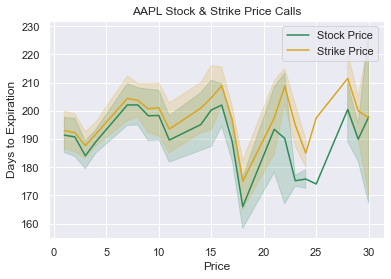

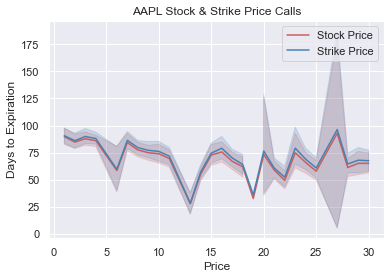

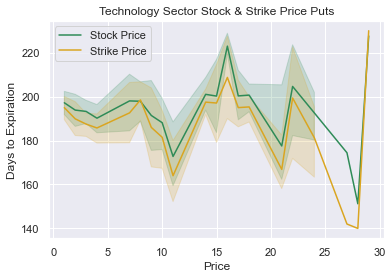

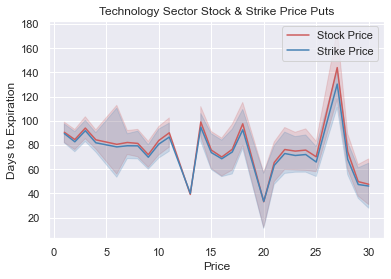

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
# First, we will plot the calls
# First, we will plot the graph for one stock: AAPL
sns.lineplot(x="DaysToExpiration", y="StockPrice", data=calls_df[calls_df['Sym'] == 'AAPL'], color="seagreen")
p1 = sns.lineplot(x="DaysToExpiration", y="Strike", data=calls_df[calls_df['Sym'] == 'AAPL'], color="goldenrod")
p1.set(title="AAPL Stock & Strike Price Calls",xlabel="Price",ylabel="Days to Expiration")
plt.legend(labels=["Stock Price","Strike Price"])
plt.show()

# Next, we will do the overall technology sector 
sns.lineplot(x="DaysToExpiration", y="StockPrice", data=calls_df[calls_df['Sector'] == 'Technology'], color="indianred")
p2 = sns.lineplot(x="DaysToExpiration", y="Strike", data=calls_df[calls_df['Sector'] == 'Technology'], color="steelblue")
p2.set(title="AAPL Stock & Strike Price Calls",xlabel="Price",ylabel="Days to Expiration")
plt.legend(labels=["Stock Price","Strike Price"])
plt.show()

# Next, we will plot the puts
# First, we will plot the graph for one stock: AAPL
sns.lineplot(x="DaysToExpiration", y="StockPrice", data=puts_df[puts_df['Sym'] == 'AAPL'], color="seagreen")
p3 = sns.lineplot(x="DaysToExpiration", y="Strike", data=puts_df[puts_df['Sym'] == 'AAPL'], color="goldenrod")
p3.set(title="Technology Sector Stock & Strike Price Puts",xlabel="Price",ylabel="Days to Expiration")
plt.legend(labels=["Stock Price","Strike Price"])
plt.show()

# Next, we will do the overall technology sector 
sns.lineplot(x="DaysToExpiration", y="StockPrice", data=puts_df[puts_df['Sector'] == 'Technology'], color="indianred")
p4 = sns.lineplot(x="DaysToExpiration", y="Strike", data=puts_df[puts_df['Sector'] == 'Technology'], color="steelblue")
p4.set(title="Technology Sector Stock & Strike Price Puts",xlabel="Price",ylabel="Days to Expiration")
plt.legend(labels=["Stock Price","Strike Price"])
plt.show()



In [36]:
# Next, we will look at the data we scraped and compare
options_data_3_11_df = pd.read_csv('yahooData/results/finalData_11.csv', delimiter=',')
options_data_3_18_df = pd.read_csv('yahooData/results/finalData_18.csv', delimiter=',')

# Add a new column for the difference of the date to expiration date
options_data_3_11_df['Record Time'] = pd.to_datetime(options_data_3_11_df['Record Time'])
options_data_3_11_df['Expiration Date'] = pd.to_datetime(options_data_3_11_df['Expiration Date'])
options_data_3_11_df['DaysToExpiration'] = options_data_3_11_df['Expiration Date'] - options_data_3_11_df['Record Time']
options_data_3_11_df['DaysToExpiration'] = options_data_3_11_df['DaysToExpiration'].dt.days + 1
print(options_data_3_11_df.head(10))

# Add a new column for the difference of the date to expiration date
options_data_3_18_df['Record Time'] = pd.to_datetime(options_data_3_18_df['Record Time'])
options_data_3_18_df['Expiration Date'] = pd.to_datetime(options_data_3_18_df['Expiration Date'])
options_data_3_18_df['DaysToExpiration'] = options_data_3_18_df['Expiration Date'] - options_data_3_18_df['Record Time']
options_data_3_18_df['DaysToExpiration'] = options_data_3_18_df['DaysToExpiration'].dt.days + 1
print(options_data_3_18_df.head(10))


  Symbol  Strike  Current Price  Implied Volatility In the Money  \
0   AAPL   105.0         160.53            2.488285         True   
1   AAPL   110.0         160.53            0.000010         True   
2   AAPL   115.0         160.53            2.072270         True   
3   AAPL   120.0         160.53            1.457034         True   
4   AAPL   125.0         160.53            1.363284         True   
5   AAPL   130.0         160.53            1.414065         True   
6   AAPL   134.0         160.53            0.000010         True   
7   AAPL   135.0         160.53            0.000010         True   
8   AAPL   136.0         160.53            0.890626         True   
9   AAPL   137.0         160.53            0.857423         True   

  Expiration Date  Call    Mark      Sector              Industry  \
0      2022-03-11  True  55.750  Technology  Consumer Electronics   
1      2022-03-11  True  50.275  Technology  Consumer Electronics   
2      2022-03-11  True  45.800  Technology 

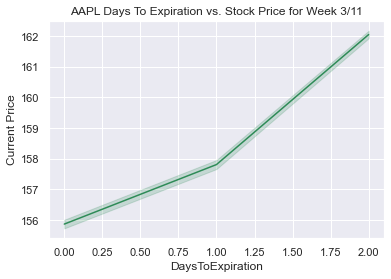

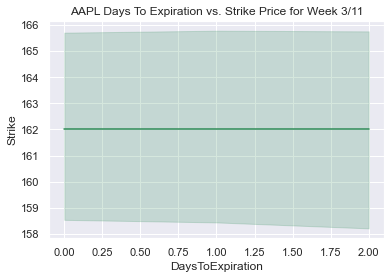

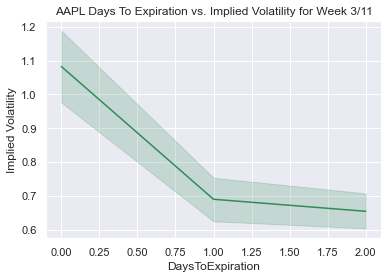

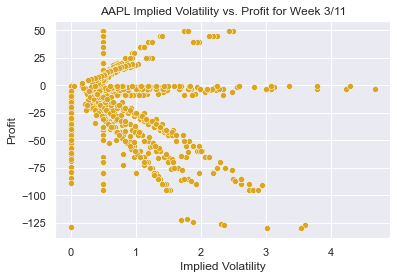

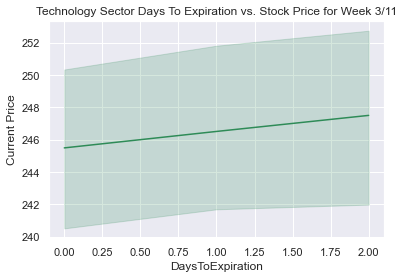

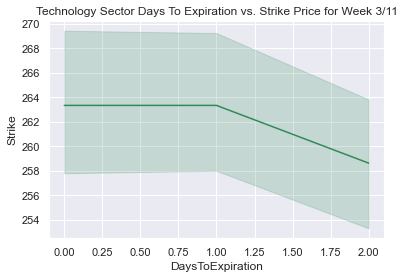

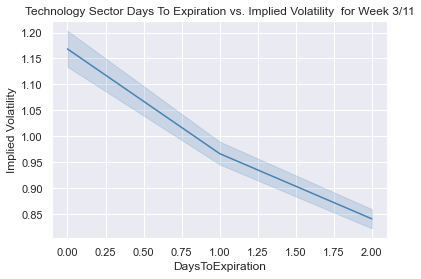

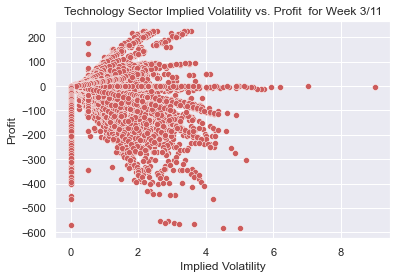

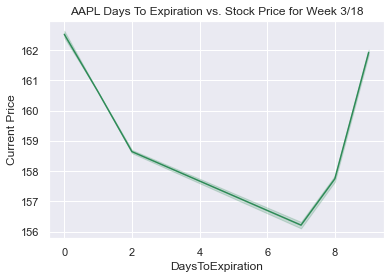

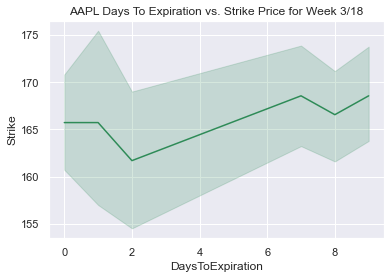

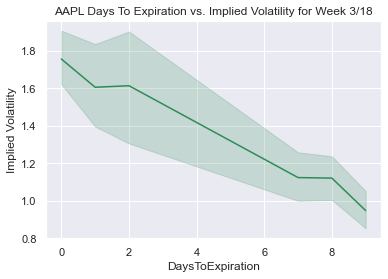

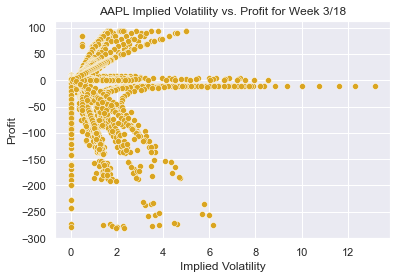

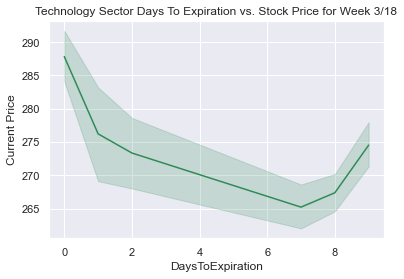

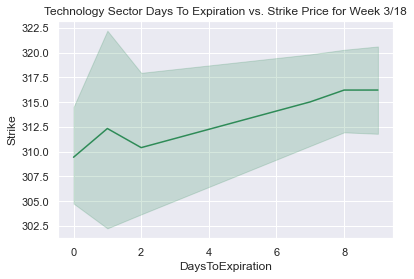

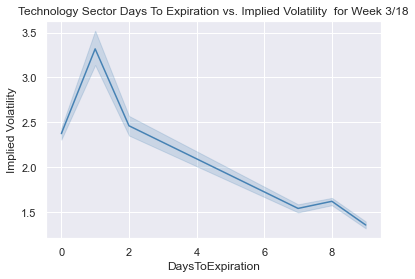

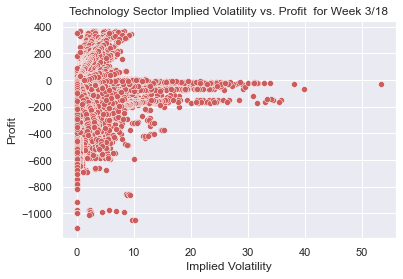

In [41]:
# We plot the options of 1 week first
# First, we will plot the graph for one stock: AAPL
p1 = sns.lineplot(x="DaysToExpiration", y="Current Price", data=options_data_3_11_df[options_data_3_11_df['Symbol'] == 'AAPL'], color="seagreen")
p1.set(title="AAPL Days To Expiration vs. Stock Price for Week 3/11")
plt.show()

p2 = sns.lineplot(x="DaysToExpiration", y="Strike", data=options_data_3_11_df[options_data_3_11_df['Symbol'] == 'AAPL'], color="seagreen")
p2.set(title="AAPL Days To Expiration vs. Strike Price for Week 3/11")
plt.show()

p3 = sns.lineplot(x="DaysToExpiration", y="Implied Volatility", data=options_data_3_11_df[options_data_3_11_df['Symbol'] == 'AAPL'], color="seagreen")
p3.set(title="AAPL Days To Expiration vs. Implied Volatility for Week 3/11")
plt.show()

p4 = sns.scatterplot(x="Implied Volatility", y="Profit", data=options_data_3_11_df[options_data_3_11_df['Symbol'] == 'AAPL'], color="goldenrod")
p4.set(title="AAPL Implied Volatility vs. Profit for Week 3/11")
plt.show()

# Then, we will plot it for a sector
p5 = sns.lineplot(x="DaysToExpiration", y="Current Price", data=options_data_3_11_df[options_data_3_11_df['Sector'] == 'Technology'], color="seagreen")
p5.set(title="Technology Sector Days To Expiration vs. Stock Price for Week 3/11")
plt.show()

p6 = sns.lineplot(x="DaysToExpiration", y="Strike", data=options_data_3_11_df[options_data_3_11_df['Sector'] == 'Technology'], color="seagreen")
p6.set(title="Technology Sector Days To Expiration vs. Strike Price for Week 3/11")
plt.show()

p7 = sns.lineplot(x="DaysToExpiration", y="Implied Volatility", data=options_data_3_11_df[options_data_3_11_df['Sector'] == 'Technology'], color="steelblue")
p7.set(title="Technology Sector Days To Expiration vs. Implied Volatility  for Week 3/11")
plt.show()

p8 = sns.scatterplot(x="Implied Volatility", y="Profit", data=options_data_3_11_df[options_data_3_11_df['Sector'] == 'Technology'], color="indianred")
p8.set(title="Technology Sector Implied Volatility vs. Profit  for Week 3/11")
plt.show()

# Then we plot it for 2 weeks
# First, we will plot the graph for one stock: AAPL
p9 = sns.lineplot(x="DaysToExpiration", y="Current Price", data=options_data_3_18_df[options_data_3_18_df['Symbol'] == 'AAPL'], color="seagreen")
p9.set(title="AAPL Days To Expiration vs. Stock Price for Week 3/18")
plt.show()

p10 = sns.lineplot(x="DaysToExpiration", y="Strike", data=options_data_3_18_df[options_data_3_18_df['Symbol'] == 'AAPL'], color="seagreen")
p10.set(title="AAPL Days To Expiration vs. Strike Price for Week 3/18")
plt.show()

p11 = sns.lineplot(x="DaysToExpiration", y="Implied Volatility", data=options_data_3_18_df[options_data_3_18_df['Symbol'] == 'AAPL'], color="seagreen")
p11.set(title="AAPL Days To Expiration vs. Implied Volatility for Week 3/18")
plt.show()

p12 = sns.scatterplot(x="Implied Volatility", y="Profit", data=options_data_3_18_df[options_data_3_18_df['Symbol'] == 'AAPL'], color="goldenrod")
p12.set(title="AAPL Implied Volatility vs. Profit for Week 3/18")
plt.show()

# Then, we will plot it for a sector
p13 = sns.scatterplot(x="DaysToExpiration", y="Current Price", data=options_data_3_18_df[options_data_3_18_df['Sector'] == 'Technology'], color="seagreen")
p13.set(title="Technology Sector Days To Expiration vs. Stock Price for Week 3/18")
plt.show()

p14 = sns.scatterplot(x="DaysToExpiration", y="Strike", data=options_data_3_18_df[options_data_3_18_df['Sector'] == 'Technology'], color="seagreen")
p14.set(title="Technology Sector Days To Expiration vs. Strike Price for Week 3/18")
plt.show()

p14 = sns.lineplot(x="DaysToExpiration", y="Implied Volatility", data=options_data_3_18_df[options_data_3_18_df['Sector'] == 'Technology'], color="steelblue")
p14.set(title="Technology Sector Days To Expiration vs. Implied Volatility  for Week 3/18")
plt.show()

p14 = sns.scatterplot(x="Implied Volatility", y="Profit", data=options_data_3_18_df[options_data_3_18_df['Sector'] == 'Technology'], color="indianred")
p14.set(title="Technology Sector Implied Volatility vs. Profit  for Week 3/18")
plt.show()

In [8]:
import gym
from gym import Env, spaces

class OptionsTrainingEnv(Env):
    def __init__(self, df):
        super(OptionsTrainingEnv, self).__init__()
        
        self.NUM_COLS = 1 # TODO: identify which features we are using
        self.observation_space = spaces.Box(low = -1, 
                                            high = 1)
    
        self.action_space = spaces.Discrete(shape = NUM_COLS)
                        
        self.options_data = df
        
def step(self, action):
    return observation, reward, done, info
def reset(self):
    return observation 
def render(self, mode='human'):
    return 
def close (self):
    return

D:\Program_Files\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
